#Task -2 

## To explore Supervised Machine Learning
### Predict the percentage of marks that a student is expected to score based upon the number of hours they studied using Linear regression.

#### Data set 

In [1]:
import numpy as np
import pandas as pd

fobj=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [2]:
fobj

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Understanding Data set

#### What does the data speak statistically !

In [3]:
fobj.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
newfobj=fobj.sort_values("Hours",axis=0,ascending=True)
newfobj

,Hours,Scores
14,1.1,17
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30
20,2.7,30
9,2.7,25
2,3.2,27
13,3.3,42
4,3.5,30


In [5]:
newfobj.median()

Hours      4.8
Scores    47.0
dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


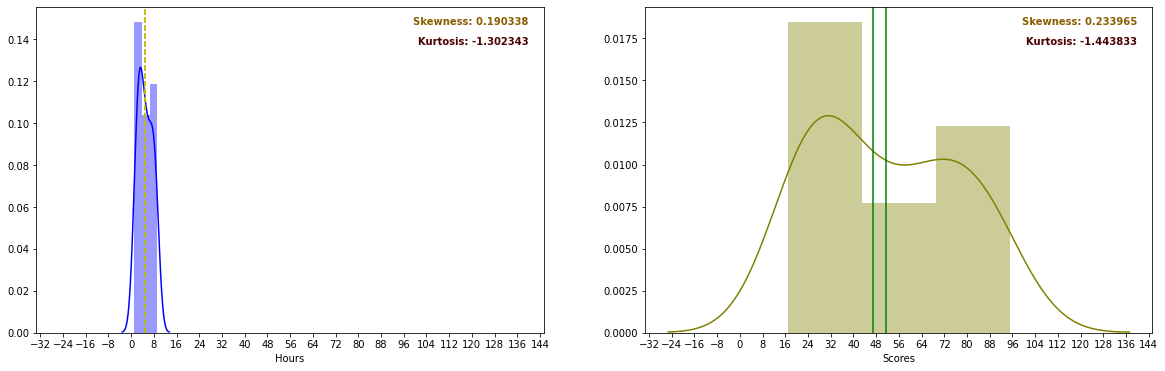

In [6]:
from scipy.stats import skew, kurtosis
import seaborn as sns; 
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(newfobj.Hours,kde=True,color="blue",ax=axes[0])
sns.distplot(newfobj.Scores,kde=True, color="olive", ax=axes[1])

for i, ax in enumerate(axes.reshape(-1)):
  ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % newfobj.iloc[:,i].skew(), 
            fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right', 
            backgroundcolor='white', color='xkcd:poo brown')
  ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % newfobj.iloc[:,i].kurt(),
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',
        backgroundcolor='white', color='xkcd:dried blood')

Hours_Central_tendency=[newfobj.Hours.mean(),newfobj.Hours.median()]
Scores_Central_tendency=[newfobj.Scores.mean(),newfobj.Scores.median()]

def plotTendencies(axs,i):
  if(i==0):
    for measurement1 in Hours_Central_tendency:
      axs.axvline(measurement1, color='y', linestyle='--')
      ax.xaxis.set_major_locator(plt.MaxNLocator(25))
  if(i==1):
    for measurement2 in Scores_Central_tendency:
      axs.axvline(measurement2, color='g', linestyle='-')

for i,ax in enumerate(axes.reshape(-1)):
  plotTendencies(ax,i)



## Collinearity check between the independent variables in the dataset

In [8]:
correlation_matrix = np.corrcoef(fobj.Hours, fobj.Scores)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print(r_squared)


0.9529481969048358


## Data Visualization

In [ ]:
!pip install seaborn

In [ ]:
!pip  install --upgrade seaborn

     |████████████████████████████████| 286kB 2.9MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


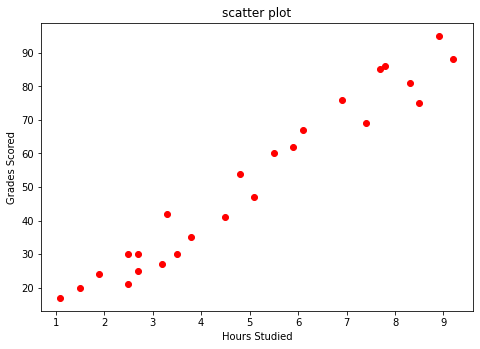

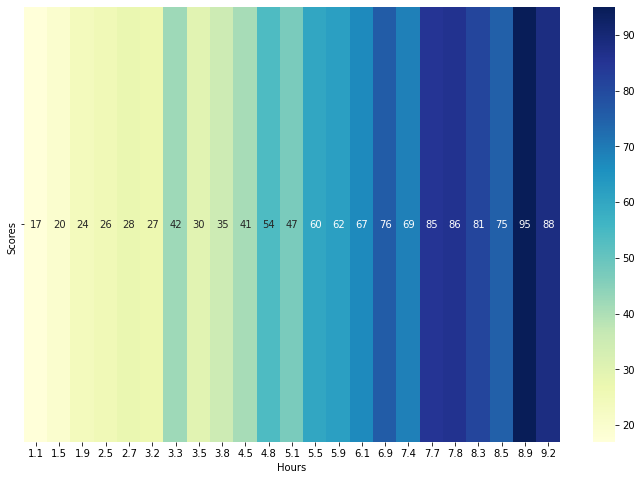

In [9]:
import seaborn as sns; 
import matplotlib.pyplot as plt

#Scatter Plot
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(fobj.Hours, fobj.Scores, color='r')
ax.set_xlabel('Hours Studied')
ax.set_ylabel('Grades Scored')
ax.set_title('scatter plot')
plt.show()

#Heatmap
heatmap1_data = pd.pivot_table(fobj, values='Scores',columns='Hours')
fig, ax = plt.subplots(figsize=(12,8)) 
sns.heatmap(heatmap1_data, annot=True, ax=ax, 
            cmap="YlGnBu")



### From the above representations we could see that as the no. of hours for study increased, the scores got better. Now, Lets prepare our prediction model

In [10]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(fobj.Hours, fobj.Scores, test_size=0.33)
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)


x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
y_train=y_train.reshape(-1,1)
clf = LinearRegression(normalize=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(r2_score(y_test,y_pred))

#x_test=np.array(x_test)
#y_test=np.array(y_test)

#x_test=x_test.reshape(-1,1)
#y_test=y_test.reshape(-1,1)
#print(clf.score(x_test,y_test))

0.9192289413950736


#### Regression line plot

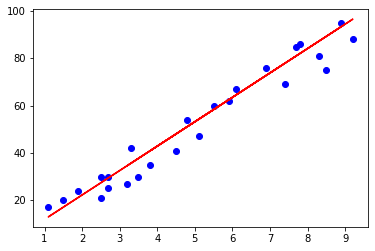

In [11]:
plt.plot(x_test, y_pred , color='red')
plt.scatter(fobj.Hours, fobj.Scores,color='blue')


### Cross-validation of the above Linear regression model

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=3,random_state=None)
result3 = cross_val_score(clf,x_test,y_test, cv=kfold, scoring='r2')

result3.mean()


0.9058987646239337

###Comparing hyperparameter optimization method using various techniques like Elasticnet, ElasticNetCV, Ridge Regression, Lasso Regression.

In [13]:
from sklearn.linear_model import ElasticNet,ElasticNetCV

elastModel = ElasticNet(alpha= 0.7, l1_ratio=0.5, fit_intercept=True,normalize=False, max_iter=1000 )
elastModel.fit(x_train,y_train)

elastModel.score(x_test,y_test)

0.9356410364374117

### Cross-validation to further optimize the ElasticNet model

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

elast=linear_model.ElasticNet()
kfold = KFold(n_splits=3,random_state=None)
result1 = cross_val_score(elastModel,x_test,y_test, cv=kfold, scoring='r2')
result2 = cross_val_score(elast,x_test,y_test, cv=kfold, scoring='r2')
print(result1.mean())
print(result2.mean())

0.9120587783057085
0.9117879588992066


## With ElasticNetCVmodel

In [15]:
elasticCVModel=ElasticNetCV(l1_ratio=[0.1,0.5,0.7,0.9],n_alphas=200,fit_intercept=True,normalize=False,max_iter=1000,cv=5)
elasticCVModel.fit(x_train,y_train)

elasticCVModel.score(x_test,y_test)



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.92544308243671

### Optimization method 2: Gradient Descent with Custom Linear regression model

## For $\theta_1$

0.9528323220779761


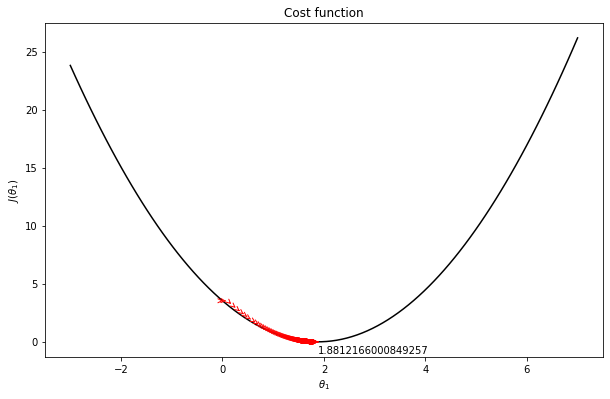

In [16]:
## Linear Regression 
import numpy as np

n = len(fobj.Hours)
y_bar=fobj.Scores.mean()
x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

N = 1000
theta1list = [0]

mean_sq_er=0
epochs = 10000
while(epochs >0):
    y_cap = a_0 + a_1 * x_val
    error = y_cap - y_val
    mean_sq_er = mean_sq_er+(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n
    a_1 = a_1 - alpha * 2 * np.sum(error * x_val)/n
    if(epochs%10==0):
      theta1list.append(a_0[0][0])
    epochs -= 1

theta1_true = a_0[0][0]

x=np.array(fobj.Hours)
y=theta1_true

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-theta1)**2, axis=1)

J = [cost_func(theta1list[0])[0]]
theta_array1=np.array(theta1list)

indx=0
while(indx<1000):
  J.append(cost_func(theta_array1[indx]))
  indx+=1

print(r2_score(y_val,y_cap))

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))

theta1_grid = np.linspace(-3,7,100)
J_grid = cost_func(theta1_grid[:,np.newaxis])
ax.plot(theta1_grid, J_grid, 'k')

for j in range(1,N):
    ax.annotate('', xy=(theta1list[j], J[j]), xytext=(theta1list[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    
ax.text(a_0[0][0],-1,str(a_0[0][0]))
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$J(\theta_1)$')
ax.set_title('Cost function')

plt.show()

## For $\theta_2$

0.9528323220779761


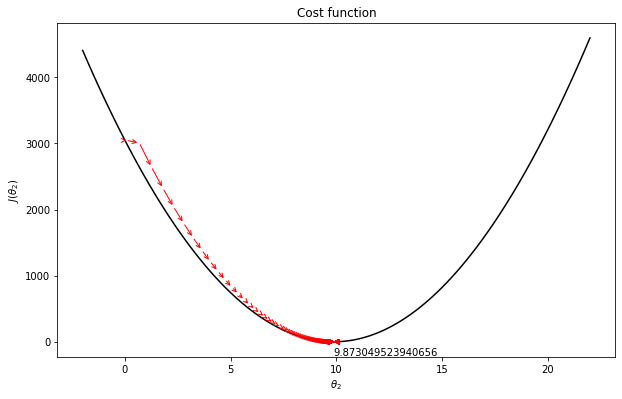

In [17]:
## Linear Regression 
import numpy as np

n = len(fobj.Hours)
y_bar=fobj.Scores.mean()
x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

N = 1000
theta2list = [0]

mean_sq_er=0
epochs = 10000
while(epochs >0):
    y_cap = a_0 + a_1 * x_val
    error = y_cap - y_val
    mean_sq_er = mean_sq_er+(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n
    a_1 = a_1 - alpha * 2 * np.sum(error * x_val)/n
    if(epochs%10==0):
      theta2list.append(a_1[0][0])
    epochs -= 1

theta1_true = a_1[0][0]

x=np.array(fobj.Hours)
y=theta1_true*x

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return (theta1*x)

J = [cost_func(theta2list[0])[0]]
theta_array2=np.array(theta2list)

indx=0
while(indx<1000):
  J.append(cost_func(theta_array2[indx]))
  indx+=1

print(r2_score(y_val,y_cap))

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))

theta2_grid = np.linspace(-2,22,100)
J_grid = cost_func(theta2_grid[:,np.newaxis])
ax.plot(theta2_grid, J_grid, 'k')

for j in range(1,N):
    ax.annotate('', xy=(theta2list[j], J[j]), xytext=(theta2list[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    
ax.text(a_1[0][0],-200,str(a_1[0][0]))
ax.set_xlabel(r'$\theta_2$')
ax.set_ylabel(r'$J(\theta_2)$')
ax.set_title('Cost function')

plt.show()

## For $\theta_1$ and $\theta_2$

0.9528323220779761


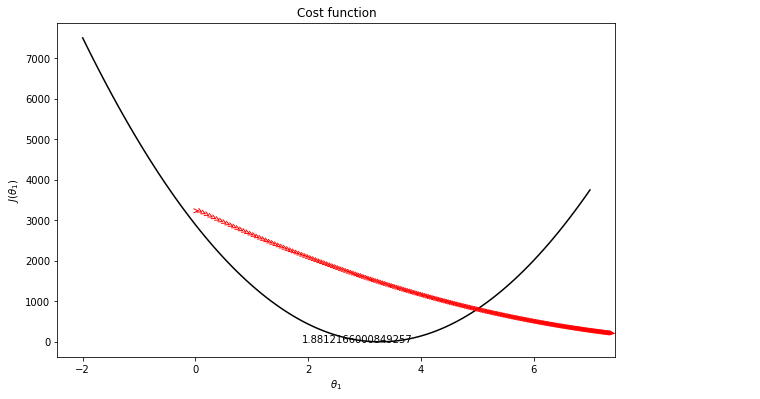

In [18]:
## Linear Regression 
import numpy as np

n = len(fobj.Hours)
y_bar=fobj.Scores.mean()
x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

N = 1000
theta1list = [0]
theta2list = [0]

mean_sq_er=0
epochs = 10000
while(epochs >0):
    y_cap = a_0 + a_1 * x_val
    error = y_cap - y_val
    mean_sq_er = mean_sq_er+(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n
    a_1 = a_1 - alpha * 2 * np.sum(error * x_val)/n
    #if(epochs%10==0):
    theta1list.append(a_0[0][0])
    theta2list.append(a_1[0][0])
    epochs -= 1

theta1_true = a_0[0][0]
theta2_true = a_1[0][0]
x=np.array(fobj.Hours)
y=theta1_true+theta2_true*x

def cost_func(theta1,theta2):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    theta2 = np.atleast_2d(np.asarray(theta2))
    return np.average((y-hypothesis(x, theta1,theta2))**2, axis=1)

def hypothesis(x, theta1,theta2):
    """Our "hypothesis function", a straight line through the origin."""
    return (theta1+theta2*x)

J = [cost_func(theta1list[0],theta2list[0])[0]]
theta_array1=np.array(theta1list)
theta_array2=np.array(theta2list)

indx=0
while(indx<1000):
  J.append(cost_func(theta_array1[indx],theta_array2[indx]))
  indx+=1

print(r2_score(y_val,y_cap))

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))

theta1_grid = np.linspace(-2,7,100)
theta2_grid = np.linspace(-5,20,100)
J_grid = cost_func(theta1_grid[:,np.newaxis],theta2_grid[:,np.newaxis])
ax.plot(theta1_grid, J_grid, 'k')

for j in range(1,N):
    ax.annotate('', xy=(theta2list[j], J[j]), xytext=(theta2list[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    
ax.text(a_0[0][0],-10,str(a_0[0][0]))
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$J(\theta_1)$')
ax.set_title('Cost function')

plt.show()

# L1 Regularization of our model

In [19]:
## Linear Regression 
import numpy as np

n = len(fobj.Hours)

x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
alphaVal = 0.0001
lambdaVal=alphaVal
a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

#N = 1000
#theta1list = [0]

mean_sq_er=0
epochs = 10000
while(epochs >0):
    y_cap = a_0 + a_1 * x_val
    error = y_cap - y_val
    mean_sq_er = mean_sq_er+(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alphaVal * (2 * np.sum(error)/n +lambdaVal)
    #if (epochs%10==0):
    #  theta1.append(a_0[0][0])
    #  J.append(cost_func(a_0[0][0]))
    a_1 = a_1 - alphaVal * (2 * np.sum(error * x_val)/n + (lambdaVal*x_val))
    epochs -= 1

print(r2_score(y_val,y_cap))

0.9528327649137571


## L2 regularization

In [20]:
## Linear Regression 
import numpy as np

n = len(fobj.Hours)

x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
alphaVal = 0.0001
lambdaVal=alphaVal+1
a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

#N = 1000
#theta1list = [0]

mean_sq_er=0
epochs = 10000
while(epochs >0):
    y_cap = a_0 + a_1 * x_val
    error = (y_cap * lambdaVal) - y_val
    mean_sq_er = mean_sq_er+(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alphaVal * (2 * np.sum(error)/n )
    #if (epochs%10==0):
    #  theta1.append(a_0[0][0])
    #  J.append(cost_func(a_0[0][0]))
    a_1 = a_1 - alphaVal * (2 * np.sum(error * x_val)/n)
    epochs -= 1

print(r2_score(y_val,y_cap))

0.9528322674606754


## Comparing Actual vs Predicted

In [21]:
# Comparing Actual vs Predicted
y_actual=np.array(fobj.Scores)
y_predicted=y_cap.ravel()
df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_predicted})  
df.head()

,Actual,Predicted
0,21,26.561184
1,47,52.228546
2,27,33.471628
3,75,85.793558
4,30,36.433247


## Contour Plot for $\theta_1$ and $\theta_2$

0.9528323220779761


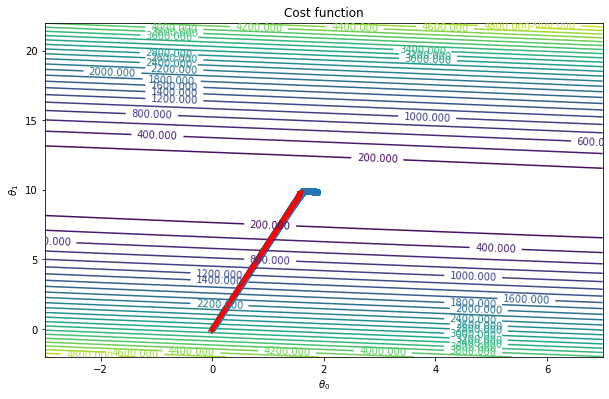

In [35]:
import numpy as np
import matplotlib.pyplot as plt

n = len(fobj.Hours)

x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

N = 1000
theta1list = [0]
theta2list = [0]

mean_sq_er=0
epochs = 10000
while(epochs >0):
    y_cap = a_0 + a_1 * x_val
    error = y_cap - y_val
    mean_sq_er = mean_sq_er+(error**2)
    mean_sq_er = mean_sq_er/n
    a_0 = a_0 - alpha * 2 * np.sum(error)/n
    a_1 = a_1 - alpha * 2 * np.sum(error * x_val)/n
    #if(epochs%10==0):
    theta1list.append(a_0[0][0])
    theta2list.append(a_1[0][0])
    epochs -= 1

theta1_true = a_0[0][0]
theta2_true = a_1[0][0]
x=np.array(fobj.Hours)
y=theta1_true+theta2_true*x

def cost_func(theta1,theta2):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_3d(np.asarray(theta1))
    theta2 = np.atleast_3d(np.asarray(theta2))
    return np.average((y-hypothesis(x, theta1,theta2))**2, axis=2)

def hypothesis(x, theta1,theta2):
    """Our "hypothesis function", a straight line through the origin."""
    return (theta1+theta2*x)

J = [cost_func(theta1list[0],theta2list[0])[0]]
theta_array1=np.array(theta1list)
theta_array2=np.array(theta2list)

indx=0
while(indx<1000):
  J.append(cost_func(theta_array1[indx],theta_array2[indx]))
  indx+=1

final_a0=a_0
final_a1=a_1

print(r2_score(y_val,y_cap))


# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6.15))


# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
#theta0_grid = np.linspace(-5,10,100)
#theta1_grid = np.linspace(5,15,100)

theta0_grid=np.linspace(-3, 7, 100)
theta1_grid=np.linspace(-2, 22, 100)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])
  
# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax.contour(X, Y, J_grid, 30)
ax.clabel(contours)

# The target parameter values indicated on the cost function contour plot
ax.scatter([theta1_true]*2,[theta2_true]*2,s=[10,10], color=['k','w'])


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
N=1000
for j in range(1,N):
    ax.annotate('', xy=(theta1list[j], theta2list[j]), xytext=(theta1list[j-1], theta2list[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
ax.scatter(theta1list,theta2list, s=40, lw=0)

# Labels, titles and a legend.
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_title('Cost function')
plt.show()

# Grid search for optimum alpha and epoch values

In [ ]:
p=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
q=[5000,10000,50000,100000]
pq = list(itertools.product(p,q))

for param in pq:
  print(param[0],param[1])

In [32]:
import itertools
n = len(fobj.Hours)
y_bar=fobj.Scores.mean()
x_val=np.array(fobj.Hours)
y_val=np.array(fobj.Scores)

x_val=x_val.reshape(-1,1)
y_val=y_val.reshape(-1,1)
#alpha = 0.0001

a_0 = np.zeros((n,1))
a_1 = np.zeros((n,1))

mean_sq_er=0
#epochs = 100000
def myLinearRegression(alpha,epochs,a_0,a_1,mean_sq_er,n):
  while(epochs >0):
      y_cap = a_0 + a_1 * x_val
      error = y_cap - y_val
      mean_sq_er = mean_sq_er+(error**2)
      mean_sq_er = mean_sq_er/n
      a_0 = a_0 - alpha * 2 * np.sum(error)/n 
      a_1 = a_1 - alpha * 2 * np.sum(error * x_val)/n
      epochs -= 1
  return y_cap

p=[0.001, 0.003, 0.01, 0.03, 0.1, 0.3]
q=[5000,10000,50000,100000]
pq = list(itertools.product(p,q))
for param in pq:
  try: 
    prediction_value = myLinearRegression(param[0],param[1],a_0,a_1,mean_sq_er,n)
    print(param[0],param[1])
    print(r2_score(y_val,prediction_value))
    print("   ")
  except:
        continue



0.001 5000
0.9529427407167019
   
0.001 10000
0.9529480773099476
   
0.001 50000
0.9529481969048356
   
0.001 100000
0.9529481969048356
   
0.003 5000
0.9529481942908865
   
0.003 10000
0.9529481969048081
   
0.003 50000
0.9529481969048356
   
0.003 100000
0.9529481969048356
   
0.01 5000
0.9529481969048356
   
0.01 10000
0.9529481969048356
   
0.01 50000
0.9529481969048356
   
0.01 100000
0.9529481969048356
   
0.03 5000
0.9529481969048356
   
0.03 10000
0.9529481969048356
   
0.03 50000
0.9529481969048356
   
0.03 100000
0.9529481969048356
   
0.1 5000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


0.1 10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


0.1 50000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


0.1 100000
0.3 5000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


0.3 10000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


0.3 50000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in subtract


0.3 100000


### What will be predicted score if a student study for 9.25 hrs in a day?

In [23]:
pred1=clf.predict([[9.25]])
pred2=elastModel.predict([[9.25]])
pred3=elasticCVModel.predict([[9.25]])

print("Student score according to Simple Linear regression model: ", str(round(pred1[0][0],2))," marks")
print("Student score according to Elastic model: ", str(round(pred2[0],2))," marks")
print("Student score according to ElasticCV model: ", str(round(pred3[0],2))," marks")

Student score according to Simple Linear regression model:  97.05  marks
Student score according to Elastic model:  93.54  marks
Student score according to ElasticCV model:  96.03  marks


In [37]:
final_a0[0][0]

1.8812166000849257

In [38]:
student_score=final_a0[0][0] + final_a1[0][0] * (9.25)

print("The Student may score :",str(round(student_score,2))," marks")

The Student may score : 93.21  marks
